In [1]:
"""
All my metrics were stored in eval_loss.log and train_loss.log
The following code reads and visualizes the losses into graphs
"""
from pathlib import Path
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
  history = {
      'train_loss': [],
      'test_loss': [],
      'accuracy': [],
      'f1': [],
      'precision': [],
      'recall': [],
      'confusion_matrix':[],
      'val_pred':[],
      'n_epochs':[]
  }

  concept_list = [("LCE","Law of Conservation of Energy"), ("KE","Kinetic Energy"), ("PE", "Potential Energy")]

In [39]:
### Change cwd path to your drive folder containing essay data
cwd = Path('drive/MyDrive/Research_LLM_Reliability/LLAMA-7b')

file1 = open(cwd/'eval_loss.log', 'r')
lines = file1.readlines()

prev_epoch = 1000
curr_concept = -1
curr_fold = -1


eval_loss_data = [ [ [] for i in range(5) ] for j in range(3) ] # will contain 3 x 5 folds
curr_fold = -1

for line in lines:
    if "eval_loss" in line:
        tok_list = re.split(': |, | ', line)
        print(tok_list)
        for tok_id, tok in enumerate(tok_list):
            if "/50" in tok:
                curr_epoch = int(tok.split("/")[0])

                # new fold starts
                if curr_epoch < prev_epoch:
                    curr_fold += 1
                    eval_loss_data.append(eval_loss_fold)
                    eval_loss_fold = []

                    if curr_fold > 4: # finished 5 folds for this concept
                        curr_fold = 0
                    if curr_fold == 0: # beginning of new concept:
                        curr_concept += 1


            if "eval_loss" in tok:
                curr_eval_loss = float(tok_list[tok_id+1])
                # print("curr_epoch" + str(curr_epoch))
                # print("curr_concept" + str(curr_concept))
                # print("curr_fold" + str(curr_fold))
                eval_loss_data[curr_concept][curr_fold].append([concept_list[curr_concept][0], curr_fold, curr_epoch, curr_eval_loss])
                prev_epoch = curr_epoch

for concept in range(3):
  for fold in range(5):
    print("concept " + concept_list[concept][0] + ", fold " + str(fold) + ": size = " + str(len(eval_loss_data[concept][fold])))

print(eval_loss_data)


['', '', '4%|▍', '', '', '', '', '', '', '', '', '|', '2/50', '[00:45<18:19', "22.91s/it]{'eval_loss'", '2.421318531036377', "'eval_runtime'", '1.6248', "'eval_samples_per_second'", '9.848', "'eval_steps_per_second'", '1.231', "'epoch'", '1.0}\n']
['', '', '8%|▊', '', '', '', '', '', '', '', '', '|', '4/50', '[01:08<12:26', "16.23s/it]{'eval_loss'", '2.2869677543640137', "'eval_runtime'", '1.6254', "'eval_samples_per_second'", '9.844', "'eval_steps_per_second'", '1.23', "'epoch'", '2.0}\n']
['', '10%|█', '', '', '', '', '', '', '', '', '|', '5/50', '[01:32<14:15', "19.02s/it]{'eval_loss'", '1.4719221591949463', "'eval_runtime'", '1.638', "'eval_samples_per_second'", '9.768', "'eval_steps_per_second'", '1.221', "'epoch'", '3.0}\n']
['', '14%|█▍', '', '', '', '', '', '', '', '|', '7/50', '[01:56<10:56', "15.27s/it]{'eval_loss'", '0.8380354642868042', "'eval_runtime'", '1.6291', "'eval_samples_per_second'", '9.822', "'eval_steps_per_second'", '1.228', "'epoch'", '4.0}\n']
['', '16%|█▌', '

In [20]:
  concept_map = {"LCE":0, "KE":1, "PE":2}

In [36]:
# training loss
train_file = open(cwd/'train_loss.log', 'r')
lines = train_file.readlines()

train_loss_data = [ [ [] for i in range(5) ] for j in range(3) ] # will contain 3 x 5 folds
curr_fold = -1
train_loss_fold = []

for line in lines:
    if "fold" in line: # new fold
        curr_fold = int(line.split("fold")[1])
        curr_concept_str = line.split("_fold")[0]
        curr_concept_id = concept_map.get(curr_concept_str)
        train_loss_data.append(train_loss_fold)
        train_loss_fold = []
    else:
        tok_list = re.split(': |, | |}', line)
        print(tok_list)
        for tok_id, tok in enumerate(tok_list):
            if "loss" in tok:
                curr_train_loss = float(tok_list[tok_id + 1])
            if "epoch" in tok:
                curr_epoch = float(tok_list[tok_id + 1])
                train_loss_data[curr_concept_id][curr_fold].append([curr_concept_str, curr_fold, curr_epoch, curr_train_loss])

print(len(train_loss_data[0]))

print("all train_loss_data")
print(train_loss_data)


for concept in range(3):
  for fold in range(5):
    print("concept " + concept_list[concept][0] + ", fold " + str(fold) + ": size = " + str(len(train_loss_data[concept][fold])))


["{'loss'", '1.1548', "'learning_rate'", '8e-05', "'epoch'", '1.0', '\n']
["{'loss'", '1.1522', "'learning_rate'", '0.00016', "'epoch'", '2.0', '\n']
["{'loss'", '0.1528', "'learning_rate'", '0.00024', "'epoch'", '2.13', '\n']
["{'loss'", '0.8074', "'learning_rate'", '0.00032', "'epoch'", '3.0', '\n']
["{'loss'", '0.6856', "'learning_rate'", '0.0004', "'epoch'", '4.0', '\n']
["{'loss'", '0.1017', "'learning_rate'", '0.00048', "'epoch'", '4.27', '\n']
["{'loss'", '0.1843', "'learning_rate'", '0.0005600000000000001', "'epoch'", '5.0', '\n']
["{'loss'", '0.1716', "'learning_rate'", '0.00064', "'epoch'", '6.0', '\n']
["{'loss'", '0.0561', "'learning_rate'", '0.0007199999999999999', "'epoch'", '6.4', '\n']
["{'loss'", '0.0897', "'learning_rate'", '0.0008', "'epoch'", '7.0', '\n']
["{'loss'", '0.1314', "'learning_rate'", '0.00088', "'epoch'", '8.0', '\n']
["{'loss'", '0.0581', "'learning_rate'", '0.00096', "'epoch'", '8.53', '\n']
["{'loss'", '0.0795', "'learning_rate'", '0.00104000000000000

In [37]:
import matplotlib.pyplot as plt

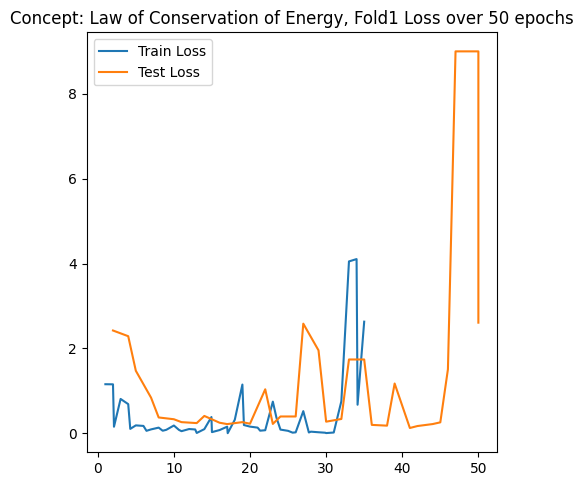

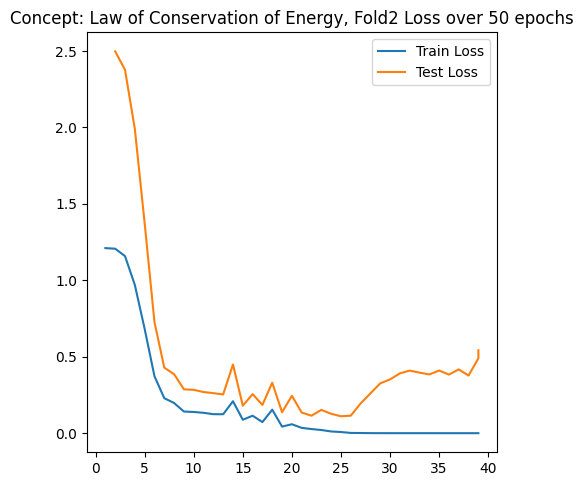

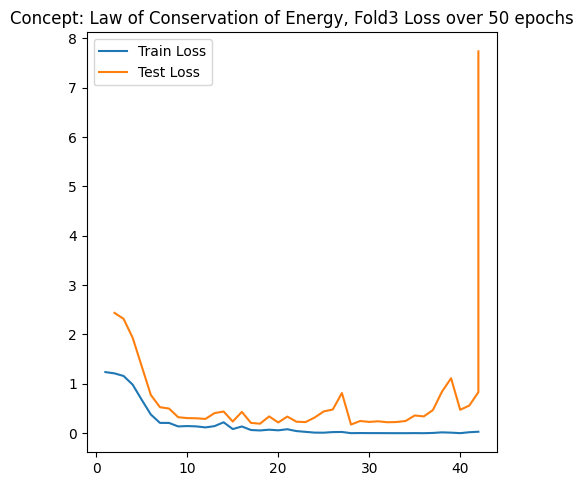

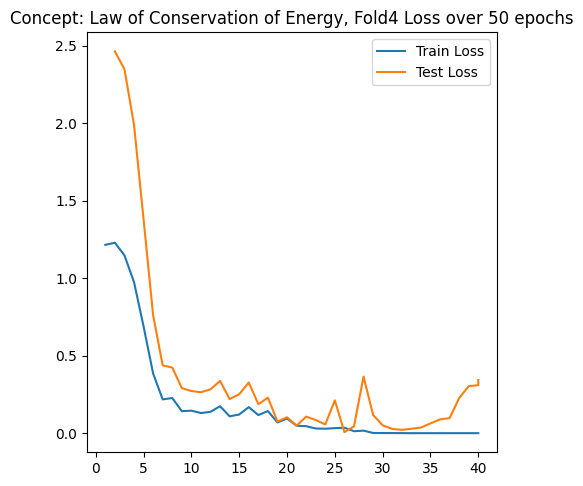

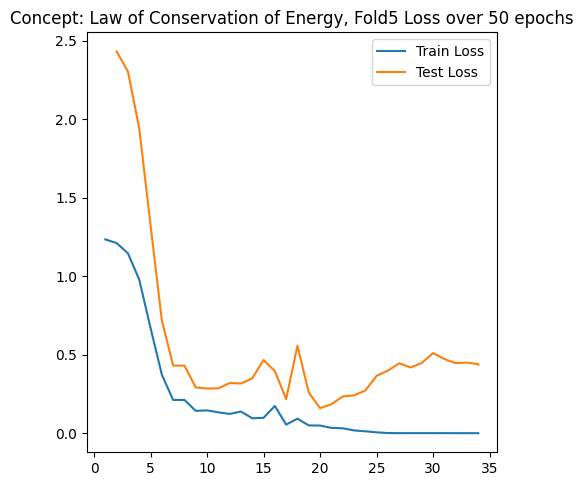

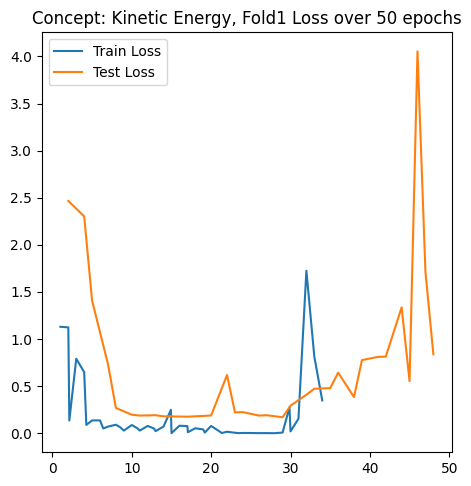

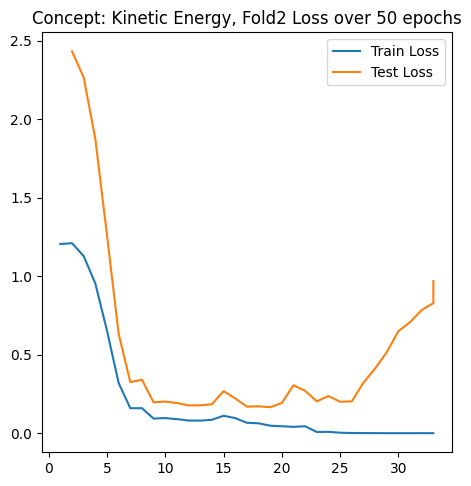

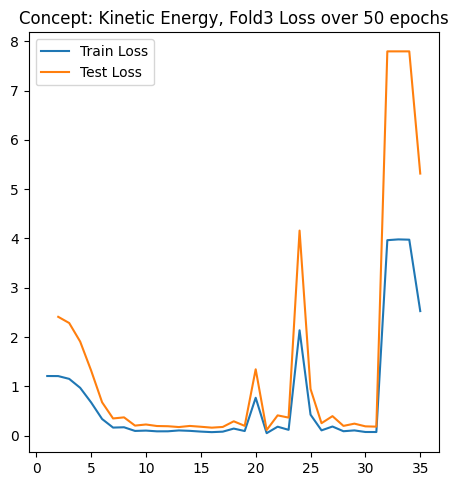

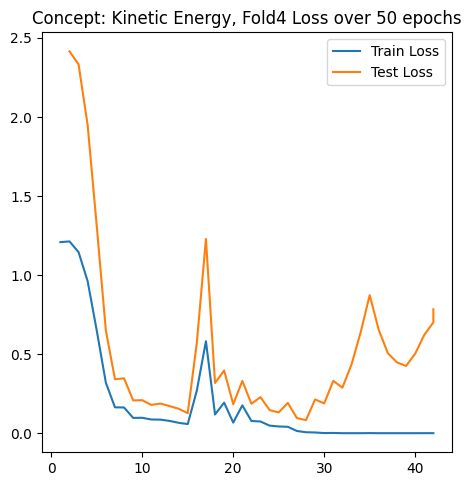

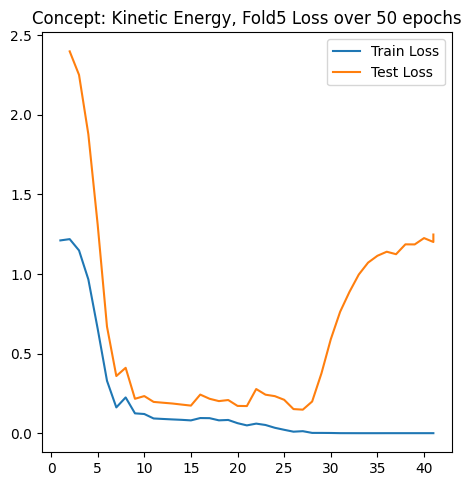

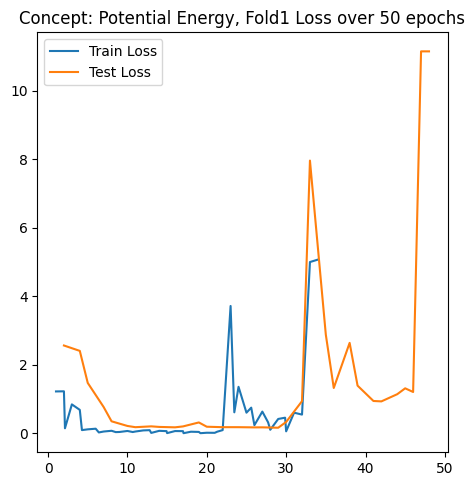

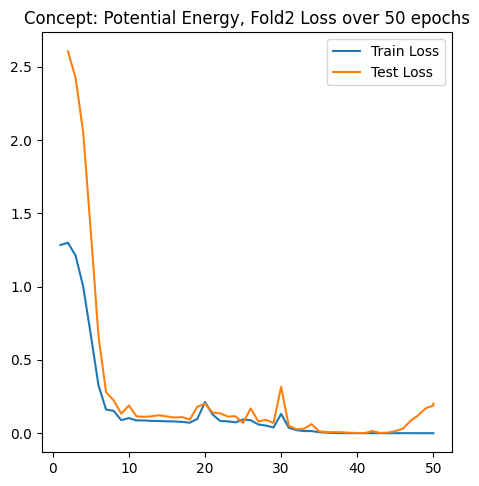

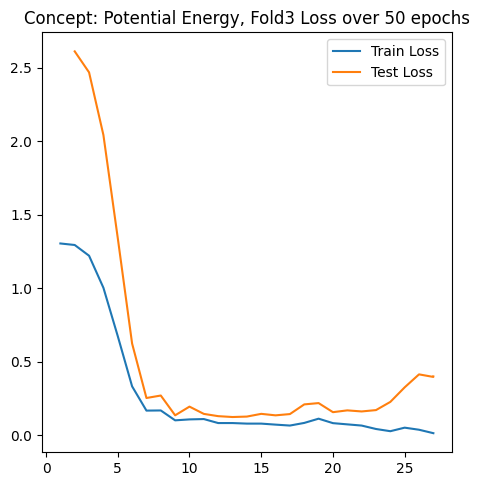

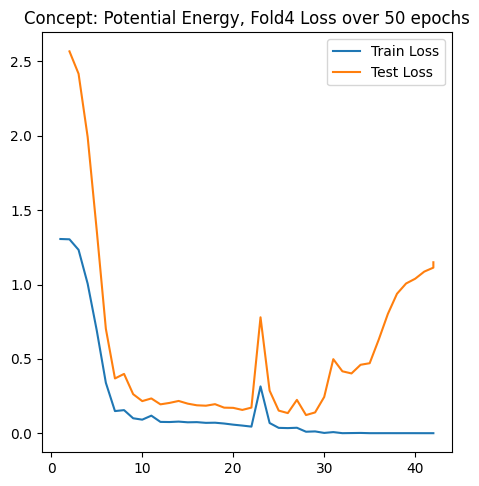

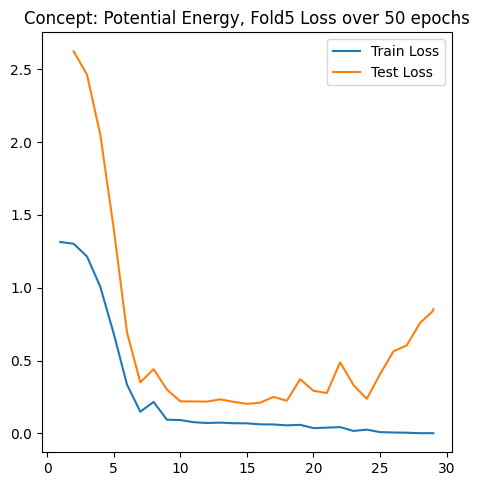

In [42]:
# Plotting loss

for concept in range(3):
    for fold in range(5):
        train_x_pos = [train_loss_data[concept][fold][i][2] for i in range(len(train_loss_data[concept][fold]))] # epoch val
        train_y_pos = [train_loss_data[concept][fold][i][3] for i in range(len(train_loss_data[concept][fold]))] # train loss val

        eval_x_pos = [eval_loss_data[concept][fold][i][2] for i in range(len(eval_loss_data[concept][fold]))] # epoch val
        eval_y_pos = [eval_loss_data[concept][fold][i][3] for i in range(len(eval_loss_data[concept][fold]))] # train loss val

        plt.figure(figsize=(18, 12))
        plt.subplot(2, 3, 1)
        plt.plot(train_x_pos, train_y_pos, label='Train Loss')
        plt.plot(eval_x_pos, eval_y_pos, label='Test Loss')
        plt.legend()
        plt.title(f'Concept: {concept_list[concept][1]}, Fold{fold+1} Loss over {50} epochs')

